# Preprocessing

In [263]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [264]:
#File does not contain headers so we need to load the headers manually
features = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos Alkaline Phosphotase", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Total Protiens", "Albumin", "Albumin-Globulin Ratio", "Selector"]
data = pd.read_csv('ilpd.csv', names = features)
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [265]:
#Overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                                583 non-null int64
Gender                             583 non-null object
Total Bilirubin                    583 non-null float64
Direct Bilirubin                   583 non-null float64
Alkphos Alkaline Phosphotase       583 non-null int64
Sgpt Alamine Aminotransferase      583 non-null int64
Sgot Aspartate Aminotransferase    583 non-null int64
Total Protiens                     583 non-null float64
Albumin                            583 non-null float64
Albumin-Globulin Ratio             579 non-null float64
Selector                           583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [266]:
#Transfrom Gender string into float values
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
data.loc[:,'Gender'] = le.transform(data['Gender'])

#Remove rows with missing values
data = data.dropna(how = 'any', axis = 0)

#Also transform Selector variable into usual conventions followed
data['Selector'] = data['Selector'].map({2:0, 1:1})

In [267]:
#Overview of data
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [268]:
#features characteristics to determine if feature scaling is necessary
data.describe()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [269]:
#seems like feature normalization needs to be done
X_train, X_test, y_train, y_test = train_test_split(data, data['Selector'], random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis

In [270]:
#Determining the healthy-affected split
data['Selector'].value_counts()

1    414
0    165
Name: Selector, dtype: int64

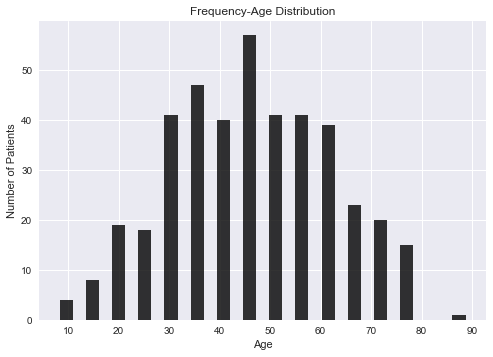

In [271]:
#Determine statistics based on age
plt.hist(data[data['Selector'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'black', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.figsize=(10,12)
plt.savefig('fig1')
plt.show()

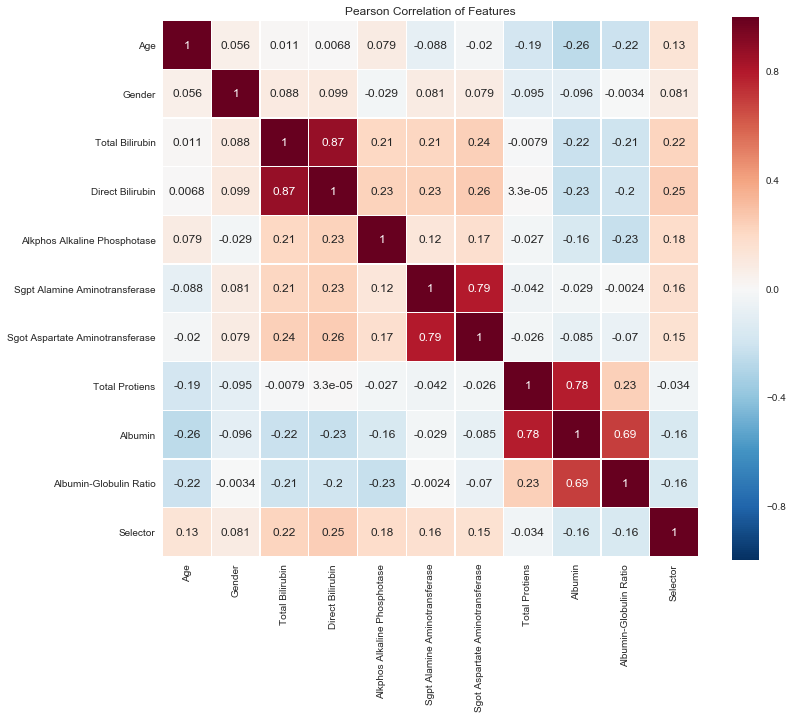

In [272]:
#correlation-matrix
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()

# Using Classification Algorithms

### 1. Logistic Regression Classifier

In [273]:
#Using normal data
logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
print(logreg.score(X_train, y_train), logreg.score(X_test, y_test))   

(0.99539170506912444, 0.99310344827586206)


In [274]:
#Using feature-scaled data
logreg_scaled = LogisticRegression(C = 0.1).fit(X_train_scaled, y_train)
print (logreg_scaled.score(X_train_scaled, y_train), logreg_scaled.score(X_test_scaled, y_test))

(1.0, 1.0)


### 2. SVM Classifier with RBF kernel

In [275]:
#Using normal data
svc_clf = SVC(C = 0.1).fit(X_train, y_train)
print (svc_clf.score(X_train, y_train), svc_clf.score(X_test, y_test))

(0.7142857142857143, 0.71724137931034482)


In [276]:
#Using scaled data
svc_clf_scaled = SVC(C = 0.1, kernel = 'rbf').fit(X_train_scaled, y_train)
print (svc_clf_scaled.score(X_train_scaled, y_train), svc_clf_scaled.score(X_test_scaled, y_test))

(1.0, 1.0)


### 3. K-NN Classifier

In [277]:
#Using normal data
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print (knn.score(X_train, y_train), knn.score(X_test, y_test))

(0.79493087557603692, 0.61379310344827587)


In [278]:
#Using scaled data
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(X_train_scaled, y_train)
print (knn_scaled.score(X_train_scaled, y_train), knn_scaled.score(X_test_scaled, y_test))

(1.0, 1.0)


### 4. Random Forest Classifier

In [279]:
#using normal data
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train, y_train)
print (rfc.score(X_train, y_train), rfc.score(X_test, y_test))

(1.0, 1.0)


In [280]:
#using scaled data
rfc_scaled = RandomForestClassifier(n_estimators = 20)
rfc_scaled.fit(X_train_scaled, y_train)
print (rfc.score(X_train_scaled, y_train), rfc.score(X_test_scaled, y_test))

(1.0, 1.0)
